In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Config
t_tx = 1e-6
fs = 300e6
bw = 100e6
oversample = 10
t = np.linspace(0, t_tx, int(t_tx * fs * oversample))

In [3]:
## For FFT
def sig_fft(sig):
    fft_sig = np.fft.fft(sig)
    N = len(fft_sig)
    T = N/(fs * oversample)
    n = np.arange(N)
    freq = n/T
    
    freq = np.fft.fftfreq(freq, fs*oversample)

    plt.plot(freq/1e6, np.abs(fft_sig))
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power")
    plt.grid()
    #plt.xlim(0, bw/1e6)

In [4]:
## Get frequencies for sawtooth, up-chirp
def f_saw(t):
    return bw/t_tx * t

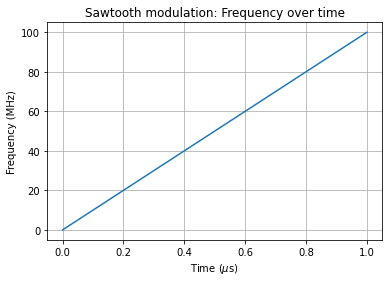

In [5]:
## Plot frequencies over time for sawtooth modulation
plt.plot(t*1e6, f_saw(t)/1e6)
plt.grid()
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Frequency (MHz)")
plt.title("Sawtooth modulation: Frequency over time")
plt.savefig("inst_up_chirp.pdf")

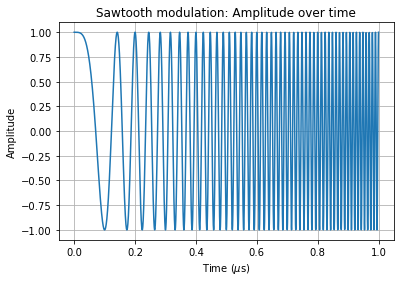

In [6]:
## Plot sawtooth modulated signal
sig = np.exp(1j*np.pi * f_saw(t) * t)
plt.plot(t*1e6, sig.real)
plt.grid()
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Amplitude")
plt.title("Sawtooth modulation: Amplitude over time")
plt.savefig("up_chirp.pdf")
plt.show()

In [7]:
sig_fft(sig)

ValueError: n should be an integer

In [ ]:
## Get frequencies for triangular modulation
def f_tri(t):
    T_ramp1 = t_tx * 0.5
    T_ramp2 = t_tx - T_ramp1
    sample = int(fs * oversample * T_ramp1)
    
    r1 = bw/T_ramp1 * t[:sample]
    r2 = bw - bw/T_ramp2 * (t[sample:] - T_ramp1)
    
    return np.block([r1, r2])

In [ ]:
## Plot triangular modulated signal
plt.plot(t*1e6, f_tri(t)/1e6)
plt.grid()
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Frequency (MHz)")
plt.title("Triangular modulation: Frequency over time")
plt.savefig("inst_triangular.pdf")

In [ ]:
sig = np.exp(1j*np.pi * f_tri(t) * t)
plt.plot(t*1e6, sig.real)
plt.grid()
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Amplitude")
plt.title("Triangular modulation: Amplitude over time")
plt.savefig("triangular.pdf")
plt.show()

In [ ]:
sig_fft(sig)